# Imports and base directory

This is the link we used : https://www.kaggle.com/kmader/analyzing-samsung-health-data

In [128]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
samsung_base_dir = os.path.join('data', 'Samsung Data', '28.11.2021')

# CSV
## Heart Rate information extraction

In [63]:
cols_names = ["pkg_name", "heart_beat_count", "time_offset", "binning_data", "max", "heart_rate", "comment", "start_time", "deviceuuid", "custom", "end_time", "datauuid", "create_time", "update_time", "min"]

# Find heart_rate file
for file in os.listdir(samsung_base_dir):
    if file.startswith("com.samsung.health.heart_rate."):
        file_name = file

df_heart_rate_csv = pd.read_csv(os.path.join(samsung_base_dir, file_name), skiprows=1, names=cols_names)
df_heart_rate_csv = df_heart_rate_csv.iloc[1::] # Drop first row, not representative of data

In [64]:
df_heart_rate_csv.head()

,pkg_name,heart_beat_count,time_offset,binning_data,max,heart_rate,comment,start_time,deviceuuid,custom,end_time,datauuid,create_time,update_time,min
1,com.sec.android.app.shealth,1,3600000,0e6c83a8-0603-2f81-2759-1b053c8e36d3.binning_data,94.000000,83.000000,NaN,28.11.2021 à 13:00:00,3hCrv0rpUB,NaN,28.11.2021 à 13:59:59,0e6c83a8-0603-2f81-2759-1b053c8e36d3,28.11.2021 à 14:02:57,28.11.2021 à 14:34:23,74.000000
2,com.sec.android.app.shealth,1,3600000,6993dda4-3b5b-ce06-4184-18db6543ab25.binning_data,107.000000,80.000000,NaN,28.11.2021 à 14:00:00,3hCrv0rpUB,NaN,28.11.2021 à 14:59:59,6993dda4-3b5b-ce06-4184-18db6543ab25,28.11.2021 à 15:08:22,28.11.2021 à 15:08:22,67.000000
3,com.sec.android.app.shealth,1,3600000,bceab3f4-da01-f7da-b238-5e46459868b2.binning_data,89.000000,77.000000,NaN,28.11.2021 à 15:00:00,3hCrv0rpUB,NaN,28.11.2021 à 15:59:59,bceab3f4-da01-f7da-b238-5e46459868b2,28.11.2021 à 16:03:32,28.11.2021 à 16:03:32,69.000000
4,com.sec.android.app.shealth,1,3600000,7210109b-b3bf-8a6a-eda4-b412d50cfb56.binning_data,90.000000,76.000000,NaN,28.11.2021 à 16:00:00,3hCrv0rpUB,NaN,28.11.2021 à 16:12:56,7210109b-b3bf-8a6a-eda4-b412d50cfb56,28.11.2021 à 16:12:56,28.11.2021 à 16:12:56,68.000000


## Remove useless columns

In [76]:
df_heart_rate = df_heart_rate_csv.drop(["pkg_name", "heart_beat_count", "binning_data", "comment", "deviceuuid", "datauuid", "custom"], axis=1)

In [77]:
df_heart_rate.head()

,time_offset,max,heart_rate,start_time,end_time,create_time,update_time,min
1,3600000,94.000000,83.000000,28.11.2021 à 13:00:00,28.11.2021 à 13:59:59,28.11.2021 à 14:02:57,28.11.2021 à 14:34:23,74.000000
2,3600000,107.000000,80.000000,28.11.2021 à 14:00:00,28.11.2021 à 14:59:59,28.11.2021 à 15:08:22,28.11.2021 à 15:08:22,67.000000
3,3600000,89.000000,77.000000,28.11.2021 à 15:00:00,28.11.2021 à 15:59:59,28.11.2021 à 16:03:32,28.11.2021 à 16:03:32,69.000000
4,3600000,90.000000,76.000000,28.11.2021 à 16:00:00,28.11.2021 à 16:12:56,28.11.2021 à 16:12:56,28.11.2021 à 16:12:56,68.000000


# JSON

In [111]:
# Find all json files
json_file_names = []
for file in os.listdir(os.path.join(samsung_base_dir, 'jsons', 'com.samsung.health.heart_rate')):
    if file != '.ipynb_checkpoints':
        json_file_names.append(file)

df_json_readings = []
for i in range(len(json_file_names)):
    file_name = json_file_names[i]
    df = pd.read_json(os.path.join(samsung_base_dir,'jsons', 'com.samsung.health.heart_rate', file_name))
    df_json_readings.append(df.copy())

df_heart_rate_json = pd.concat(df_json_readings, axis=0, ignore_index=True)
df_heart_rate_json = df_heart_rate_json.sort_values(by=['start_time'], ascending=True, ignore_index=True)

In [121]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_heart_rate_json)
df_heart_rate_json.head(1000)

,heart_rate,heart_rate_max,heart_rate_min,start_time,end_time
0,80,82,79,2021-11-28 12:40:00,2021-11-28 12:40:59
1,83,87,78,2021-11-28 12:41:00,2021-11-28 12:41:59
2,82,85,80,2021-11-28 12:42:00,2021-11-28 12:42:59
3,83,86,80,2021-11-28 12:43:00,2021-11-28 12:43:59
4,80,82,77,2021-11-28 12:44:00,2021-11-28 12:44:59
...,...,...,...,...,...
148,76,82,72,2021-11-28 15:08:00,2021-11-28 15:08:59
149,73,76,71,2021-11-28 15:09:00,2021-11-28 15:09:59
150,75,80,73,2021-11-28 15:10:00,2021-11-28 15:10:59
151,76,78,73,2021-11-28 15:11:00,2021-11-28 15:11:59


# Plot heart rate

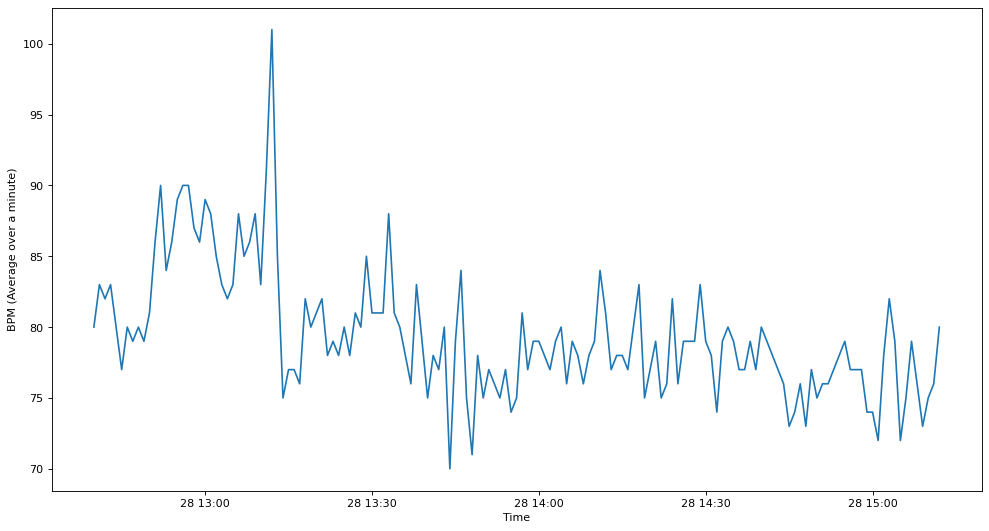

In [134]:
figure(figsize=(15, 8), dpi=80)


plt.xlabel("Time")
plt.ylabel("BPM (Average over a minute)")
plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate'])
#plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate_max'], color='red')
#plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate_min'], color='green')